In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR, VARMAX
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import het_arch
import numpy as np

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m')

In [3]:
df_original = pd.ExcelFile

In [4]:
xls = pd.ExcelFile(r'C:\Users\Nitai Nijholt\Desktop\BSC Thesis\JSTdatasetR5-isolated.xlsx')
df_original = pd.read_excel(xls)

In [5]:
#selecting rows where country = netherlands

df_netherlands=df_original.loc[df_original["country"]=="Netherlands"]
df_netherlands

,year,country,iso,ifs,pop,rgdpmad,rgdppc,rconpc,gdp,iy,...,eq_capgain,eq_dp,eq_capgain_interp,eq_tr_interp,eq_dp_interp,bond_rate,eq_div_rtn,capital_tr,risky_tr,safe_tr
1924,1870,Netherlands,NLD,138,3610.000000,2755.225048,11.448137,12.738100,9.314076e+02,0.094127,...,NaN,NaN,NaN,NaN,NaN,0.047500,NaN,NaN,NaN,0.027531
1925,1871,Netherlands,NLD,138,3636.000000,2738.354544,11.377703,12.554200,9.720918e+02,0.088727,...,NaN,NaN,NaN,NaN,NaN,0.043300,NaN,NaN,NaN,0.033718
1926,1872,Netherlands,NLD,138,3662.000000,2768.513641,11.504200,13.875000,1.093801e+03,0.096733,...,NaN,NaN,NaN,NaN,NaN,0.046600,NaN,NaN,NaN,0.071887
1927,1873,Netherlands,NLD,138,3670.000000,2825.265630,11.742618,13.837200,1.181001e+03,0.089237,...,NaN,NaN,NaN,NaN,NaN,0.043300,NaN,NaN,NaN,0.054941
1928,1874,Netherlands,NLD,138,3745.000000,2720.905017,11.303293,13.870600,1.148704e+03,0.086719,...,NaN,NaN,NaN,NaN,NaN,0.040100,NaN,NaN,NaN,0.068346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,2013,Netherlands,NLD,138,17007.648622,24119.357840,104.392064,97.439361,1.455469e+06,0.182350,...,0.149301,0.031467,NaN,NaN,NaN,0.019613,0.036165,0.034603,0.044808,-0.013692
2068,2014,Netherlands,NLD,138,17069.387885,24374.347728,105.497681,97.453251,1.479923e+06,0.184700,...,0.065989,0.028390,NaN,NaN,NaN,0.014542,0.030264,0.072375,0.068163,0.091712
2069,2015,Netherlands,NLD,138,17142.260457,24746.028863,107.088867,98.940435,1.520578e+06,0.199240,...,0.049807,0.029839,NaN,NaN,NaN,0.006902,0.031325,0.067868,0.081826,-0.000843
2070,2016,Netherlands,NLD,138,17236.387529,25150.292033,108.855100,99.517184,1.560969e+06,0.200560,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_netherlands.columns

Index(['year', 'country', 'iso', 'ifs', 'pop', 'rgdpmad', 'rgdppc', 'rconpc',
       'gdp', 'iy', 'cpi', 'ca', 'imports', 'exports', 'narrowm', 'money',
       'stir', 'ltrate', 'hpnom', 'debtgdp', 'revenue', 'expenditure', 'xrusd',
       'tloans', 'tmort', 'thh', 'tbus', 'lev', 'ltd', 'noncore', 'crisisJST',
       'crisisJST_old', 'peg', 'peg_strict', 'peg_type', 'peg_base',
       'JSTtrilemmaIV', 'JSTtrilemmaIV_R', 'eq_tr', 'housing_tr', 'bond_tr',
       'bill_rate', 'rent_ipolated', 'housing_capgain_ipolated',
       'housing_capgain', 'housing_rent_rtn', 'housing_rent_yd', 'eq_capgain',
       'eq_dp', 'eq_capgain_interp', 'eq_tr_interp', 'eq_dp_interp',
       'bond_rate', 'eq_div_rtn', 'capital_tr', 'risky_tr', 'safe_tr'],
      dtype='object')

In [7]:
#selecting variables of intrest:

df_netherlands_var_of_intrest = df_netherlands[['year', 'tmort', 'hpnom','rgdppc','cpi','lev', 'ltd', 'pop','ltrate','thh']]
df_netherlands_var_of_intrest

,year,tmort,hpnom,rgdppc,cpi,lev,ltd,pop,ltrate,thh
1924,1870,NaN,3.758240,11.448137,6.861802,NaN,NaN,3610.000000,4.750000,NaN
1925,1871,NaN,4.012170,11.377703,7.531862,NaN,NaN,3636.000000,4.330000,NaN
1926,1872,NaN,4.266100,11.504200,8.402618,NaN,NaN,3662.000000,4.660000,NaN
1927,1873,NaN,4.689100,11.742618,8.577742,NaN,NaN,3670.000000,4.330000,NaN
1928,1874,NaN,5.112090,11.303293,8.558529,NaN,NaN,3745.000000,4.010000,NaN
...,...,...,...,...,...,...,...,...,...,...
2067,2013,1.053554e+06,331.462486,104.392064,168.703462,5.201437,106.771141,17007.648622,1.961333,9.488911e+05
2068,2014,1.020622e+06,334.233332,105.497681,169.244576,5.139683,105.002083,17069.387885,1.454250,9.382472e+05
2069,2015,1.064169e+06,346.355785,107.088867,169.616061,5.425585,104.579170,17142.260457,0.690167,9.886174e+05
2070,2016,1.081019e+06,363.673574,108.855100,169.802651,5.557453,101.958565,17236.387529,0.292083,1.014795e+06


In [8]:
df_netherlands_var_of_intrest['tmort'].isnull().sum()

30

In [9]:
#dropping nans

df_netherlands_var_of_intrest_clean = df_netherlands_var_of_intrest.dropna()

In [10]:
df_netherlands_var_of_intrest_clean

,year,tmort,hpnom,rgdppc,cpi,lev,ltd,pop,ltrate,thh
2044,1990,1.371422e+05,100.000000,74.640200,100.000000,4.336841,77.667358,14951.510000,8.920830,1.599982e+05
2045,1991,1.460121e+05,102.595000,75.842482,103.133300,4.653763,81.221649,15066.220000,8.739170,1.668848e+05
2046,1992,1.542526e+05,111.192000,76.588316,106.416700,4.639183,82.293053,15174.240000,8.100830,1.800519e+05
2047,1993,1.752395e+05,120.358000,77.073816,109.166700,4.806044,83.921371,15274.940000,6.360000,2.011613e+05
2048,1994,2.003067e+05,135.171000,78.871379,112.225000,5.049233,89.973358,15382.200000,6.862500,2.310061e+05
2049,1995,2.311152e+05,144.538000,80.911947,114.383300,4.990154,92.490746,15459.050000,6.899170,2.695931e+05
2050,1996,2.741550e+05,160.341000,83.364624,116.758300,5.044448,98.991798,15527.810000,6.150000,3.140022e+05
2051,1997,3.276613e+05,179.227000,86.465789,118.924449,5.507670,110.109024,15604.460000,5.575830,3.758185e+05
2052,1998,4.540492e+05,198.885000,89.333736,121.046494,5.030958,118.460220,15699.260000,4.630000,4.235508e+05
2053,1999,5.338530e+05,231.261000,92.923561,123.511188,4.849299,127.544106,15801.950000,4.629170,4.920951e+05


In [11]:
#Checking for any Nans. For each column, the function returns True if nans are found, otherwise it prints: No nans found
for i in ['year', 'tmort', 'hpnom','rgdppc','cpi','lev', 'ltd']:
    if df_netherlands_var_of_intrest_clean[i].isnull().values.any() == True:
       print(True)
    else: 
        print(f"{i} " + "No Nans found")

year No Nans found
tmort No Nans found
hpnom No Nans found
rgdppc No Nans found
cpi No Nans found
lev No Nans found
ltd No Nans found


In [12]:
#defining variables for plotting
mortgages = df_netherlands_var_of_intrest["tmort"]
house_price = df_netherlands_var_of_intrest['hpnom']
years = df_netherlands_var_of_intrest['year']
real_gdp = df_netherlands_var_of_intrest['rgdppc']
cpi = df_netherlands_var_of_intrest['cpi']
#housing_total_return = df_netherlands_var_of_intrest['housing_tr']
bank_capital_ratio_in_percent= df_netherlands_var_of_intrest['lev']
bank_loan_to_deposit_in_percent= df_netherlands_var_of_intrest['ltd']

In [13]:
mortgages.describe()

count    1.180000e+02
mean     1.869548e+05
std      3.513578e+05
min      3.005000e+02
25%      8.675750e+02
50%      2.780200e+03
75%      1.242287e+05
max      1.082046e+06
Name: tmort, dtype: float64

In [14]:
house_price.describe()

count    148.000000
mean      68.959701
std      115.801149
min        3.758240
25%        5.117828
50%        8.141915
75%       81.367450
max      407.020000
Name: hpnom, dtype: float64

In [15]:
z = 0

for i in df_netherlands.columns:
    print (i)
    

year
country
iso
ifs
pop
rgdpmad
rgdppc
rconpc
gdp
iy
cpi
ca
imports
exports
narrowm
money
stir
ltrate
hpnom
debtgdp
revenue
expenditure
xrusd
tloans
tmort
thh
tbus
lev
ltd
noncore
crisisJST
crisisJST_old
peg
peg_strict
peg_type
peg_base
JSTtrilemmaIV
JSTtrilemmaIV_R
eq_tr
housing_tr
bond_tr
bill_rate
rent_ipolated
housing_capgain_ipolated
housing_capgain
housing_rent_rtn
housing_rent_yd
eq_capgain
eq_dp
eq_capgain_interp
eq_tr_interp
eq_dp_interp
bond_rate
eq_div_rtn
capital_tr
risky_tr
safe_tr


In [16]:
cbs_population_data_csv = pd.read_csv(r'C:\Users\Nitai Nijholt\Desktop\BSC Thesis\37296eng_UntypedDataSet_29042022_212931.csv', sep=';')
cbs_population_data_csv


,ID,Periods,TotalPopulation_1,Males_2,Females_3,TotalPopulation_4,NeverMarried_5,Married_6,Widowed_7,Divorced_8,...,LiveBirths_69,Deaths_70,NaturalIncrease_71,NaturalIncreaseRate_72,Immigration_73,EmigrationIncludingAdministrati_74,NetMigrationIncludingAdministrativ_75,NetMigrationIncludingAdminRate_76,OtherCorrections_77,PopulationDensity_78
0,0,1950JJ00,10026773,4998251,5028522,10026773,5284496,4232241,435532,74504,...,229718.0,75929.0,153789.0,15.2,70602.0,50697.0,19905.0,2.0,-187.0,309
1,1,1951JJ00,10200280,5083759,5116521,10200280,5354293,4329761,439933,76293,...,228407.0,77560.0,150847.0,14.7,45016.0,67449.0,-22433.0,-2.2,-351.0,315
2,2,1952JJ00,10328343,5145772,5182571,10328343,5384853,4421572,444343,77575,...,231888.0,76346.0,155542.0,15.0,33666.0,81347.0,-47681.0,-4.6,-573.0,319
3,3,1953JJ00,10435631,5198033,5237598,10435631,5409984,4497526,449090,79031,...,227964.0,80901.0,147063.0,14.0,35449.0,67080.0,-31631.0,-3.0,-326.0,322
4,4,1954JJ00,10550737,5256108,5294629,10550737,5443474,4572974,454436,79853,...,228173.0,79623.0,148550.0,14.0,42418.0,61368.0,-18950.0,-1.8,-314.0,325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,67,2017JJ00,17081507,8475102,8606405,17081507,8201061,6718468,859720,1302258,...,169836.0,150214.0,19622.0,1.1,234957.0,154292.0,80665.0,4.7,-710.0,507
68,68,2018JJ00,17181084,8527041,8654043,17181084,8287607,6710175,858676,1324626,...,168525.0,153363.0,15162.0,0.9,243737.0,157366.0,86371.0,5.0,-454.0,510
69,69,2019JJ00,17282163,8581086,8701077,17282163,8374133,6706554,858443,1343033,...,169680.0,151885.0,17795.0,1.0,269064.0,161029.0,108035.0,6.3,-408.0,513
70,70,2020JJ00,17407585,8648031,8759554,17407585,8474556,6713002,859020,1361007,...,168681.0,168678.0,3.0,0.0,220853.0,152494.0,68359.0,3.9,-532.0,517


In [17]:
def row_updater(row):
    return row[0:4]

In [18]:
cbs_population_data_csv['Periods'] = cbs_population_data_csv['Periods'].apply(row_updater)

In [19]:
cbs_population_data_csv

,ID,Periods,TotalPopulation_1,Males_2,Females_3,TotalPopulation_4,NeverMarried_5,Married_6,Widowed_7,Divorced_8,...,LiveBirths_69,Deaths_70,NaturalIncrease_71,NaturalIncreaseRate_72,Immigration_73,EmigrationIncludingAdministrati_74,NetMigrationIncludingAdministrativ_75,NetMigrationIncludingAdminRate_76,OtherCorrections_77,PopulationDensity_78
0,0,1950,10026773,4998251,5028522,10026773,5284496,4232241,435532,74504,...,229718.0,75929.0,153789.0,15.2,70602.0,50697.0,19905.0,2.0,-187.0,309
1,1,1951,10200280,5083759,5116521,10200280,5354293,4329761,439933,76293,...,228407.0,77560.0,150847.0,14.7,45016.0,67449.0,-22433.0,-2.2,-351.0,315
2,2,1952,10328343,5145772,5182571,10328343,5384853,4421572,444343,77575,...,231888.0,76346.0,155542.0,15.0,33666.0,81347.0,-47681.0,-4.6,-573.0,319
3,3,1953,10435631,5198033,5237598,10435631,5409984,4497526,449090,79031,...,227964.0,80901.0,147063.0,14.0,35449.0,67080.0,-31631.0,-3.0,-326.0,322
4,4,1954,10550737,5256108,5294629,10550737,5443474,4572974,454436,79853,...,228173.0,79623.0,148550.0,14.0,42418.0,61368.0,-18950.0,-1.8,-314.0,325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,67,2017,17081507,8475102,8606405,17081507,8201061,6718468,859720,1302258,...,169836.0,150214.0,19622.0,1.1,234957.0,154292.0,80665.0,4.7,-710.0,507
68,68,2018,17181084,8527041,8654043,17181084,8287607,6710175,858676,1324626,...,168525.0,153363.0,15162.0,0.9,243737.0,157366.0,86371.0,5.0,-454.0,510
69,69,2019,17282163,8581086,8701077,17282163,8374133,6706554,858443,1343033,...,169680.0,151885.0,17795.0,1.0,269064.0,161029.0,108035.0,6.3,-408.0,513
70,70,2020,17407585,8648031,8759554,17407585,8474556,6713002,859020,1361007,...,168681.0,168678.0,3.0,0.0,220853.0,152494.0,68359.0,3.9,-532.0,517


In [20]:
cbs_population_data_csv.rename(columns = {'Periods':'year'} , inplace = True)

In [21]:
cbs_population_data_csv.columns

Index(['ID', 'year', 'TotalPopulation_1', 'Males_2', 'Females_3',
       'TotalPopulation_4', 'NeverMarried_5', 'Married_6', 'Widowed_7',
       'Divorced_8', 'TotalPopulation_9', 'YoungerThan20Years_10',
       'k_20To40Years_11', 'k_40To65Years_12', 'k_65To80Years_13',
       'k_80YearsOrOlder_14', 'YoungerThan20Years_15', 'k_20To40Years_16',
       'k_40To65Years_17', 'k_65To80Years_18', 'k_80YearsOrOlder_19',
       'TotalDemographicPressure_20', 'GreenPressure_21', 'GreyPressure_22',
       'TotalPopulation_23', 'Males_24', 'Females_25', 'TotalPopulation_26',
       'PersonsWithADutchBackground_27', 'WithMigrationBackground_28',
       'WithMigrationBackgroundRate_29', 'TotalWesternMigrationBackground_30',
       'MiddleAndEasternEuropeanEUCountries_31',
       'GIPSCountriesEuropeanUnion_32', 'OtherWesternBackground_33',
       'TotalNonWestern_34', 'Morocco_35', 'FormerNethAntillesAndAruba_36',
       'Suriname_37', 'Turkey_38', 'OtherNonWesternBackground_39',
       'TotalFirst

In [22]:
cbs_population_data_csv_vars_of_intrest = cbs_population_data_csv[['year','TotalPopulation_1','TotalPopulation_4','YoungerThan20Years_10','YoungerThan20Years_10',
       'k_20To40Years_11', 'k_40To65Years_12', 'k_65To80Years_13',
       'k_80YearsOrOlder_14', 'YoungerThan20Years_15', 'k_20To40Years_16',
       'k_40To65Years_17', 'k_65To80Years_18', 'k_80YearsOrOlder_19',
       'TotalDemographicPressure_20', 'GreenPressure_21', 'GreyPressure_22',
       'TotalPopulation_23', 'Males_24', 'Females_25']]

cbs_population_data_csv_vars_of_intrest

,year,TotalPopulation_1,TotalPopulation_4,YoungerThan20Years_10,YoungerThan20Years_10,k_20To40Years_11,k_40To65Years_12,k_65To80Years_13,k_80YearsOrOlder_14,YoungerThan20Years_15,k_20To40Years_16,k_40To65Years_17,k_65To80Years_18,k_80YearsOrOlder_19,TotalDemographicPressure_20,GreenPressure_21,GreyPressure_22,TotalPopulation_23,Males_24,Females_25
0,1950,10026773,10026773,3742499,3742499,2951369,2562311,670995,99599,37.3,29.4,25.6,6.7,1.0,81.9,67.9,14.0,30.8,30.3,31.3
1,1951,10200280,10200280,3805617,3805617,2985744,2614428,690449,104042,37.3,29.3,25.6,6.8,1.0,82.1,68.0,14.2,30.8,30.3,31.4
2,1952,10328343,10328343,3853988,3853988,2999353,2656483,710729,107790,37.3,29.0,25.7,6.9,1.0,82.6,68.1,14.5,31.0,30.4,31.5
3,1953,10435631,10435631,3894738,3894738,2996594,2700881,729809,113609,37.3,28.7,25.9,7.0,1.1,83.2,68.4,14.8,31.1,30.5,31.6
4,1954,10550737,10550737,3945330,3945330,2994204,2744425,747436,119342,37.4,28.4,26.0,7.1,1.1,83.9,68.8,15.1,31.2,30.6,31.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2017,17081507,17081507,3817173,3817173,4206639,5898035,2395385,764275,22.3,24.6,34.5,14.0,4.5,69.0,37.8,31.3,41.6,40.7,42.5
68,2018,17181084,17181084,3810656,3810656,4253083,5878229,2460202,778914,22.2,24.8,34.2,14.3,4.5,69.6,37.6,32.0,41.8,41.0,42.6
69,2019,17282163,17282163,3791838,3791838,4309987,5866334,2515184,798820,21.9,24.9,33.9,14.6,4.6,69.8,37.3,32.6,42.0,41.2,42.8
70,2020,17407585,17407585,3775257,3775257,4381481,5858292,2570467,822088,21.7,25.2,33.7,14.8,4.7,70.0,36.9,33.1,42.2,41.3,43.0


In [23]:
#checking for nans before joining datasets

cbs_population_data_csv_vars_of_intrest.isnull().values.any()

False

In [24]:
df_netherlands_var_of_intrest_clean.isnull().values.any()


False

In [25]:
df_netherlands_var_of_intrest_clean

,year,tmort,hpnom,rgdppc,cpi,lev,ltd,pop,ltrate,thh
2044,1990,1.371422e+05,100.000000,74.640200,100.000000,4.336841,77.667358,14951.510000,8.920830,1.599982e+05
2045,1991,1.460121e+05,102.595000,75.842482,103.133300,4.653763,81.221649,15066.220000,8.739170,1.668848e+05
2046,1992,1.542526e+05,111.192000,76.588316,106.416700,4.639183,82.293053,15174.240000,8.100830,1.800519e+05
2047,1993,1.752395e+05,120.358000,77.073816,109.166700,4.806044,83.921371,15274.940000,6.360000,2.011613e+05
2048,1994,2.003067e+05,135.171000,78.871379,112.225000,5.049233,89.973358,15382.200000,6.862500,2.310061e+05
2049,1995,2.311152e+05,144.538000,80.911947,114.383300,4.990154,92.490746,15459.050000,6.899170,2.695931e+05
2050,1996,2.741550e+05,160.341000,83.364624,116.758300,5.044448,98.991798,15527.810000,6.150000,3.140022e+05
2051,1997,3.276613e+05,179.227000,86.465789,118.924449,5.507670,110.109024,15604.460000,5.575830,3.758185e+05
2052,1998,4.540492e+05,198.885000,89.333736,121.046494,5.030958,118.460220,15699.260000,4.630000,4.235508e+05
2053,1999,5.338530e+05,231.261000,92.923561,123.511188,4.849299,127.544106,15801.950000,4.629170,4.920951e+05


In [26]:
#joining datasets (df_netherlands_var_of_intrest_clean with df_original_cbs) on years
right_GDPppc_Nominmal_Netherlands_data=pd.read_csv(r'C:\Users\Nitai Nijholt\Desktop\BSC Thesis\Right GDP Netherlands.csv')


df_merged = df_netherlands_var_of_intrest_clean.merge(cbs_population_data_csv_vars_of_intrest.astype(int))
df_merged = df_merged.merge(right_GDPppc_Nominmal_Netherlands_data.astype(int))

df_merged

,year,tmort,hpnom,rgdppc,cpi,lev,ltd,pop,ltrate,thh,...,k_40To65Years_17,k_65To80Years_18,k_80YearsOrOlder_19,TotalDemographicPressure_20,GreenPressure_21,GreyPressure_22,TotalPopulation_23,Males_24,Females_25,GDP per capita (current US$)
0,1990,1.371422e+05,100.000000,74.640200,100.000000,4.336841,77.667358,14951.510000,8.920830,1.599982e+05,...,28,9,2,62,41,20,36,35,37,21290
1,1991,1.460121e+05,102.595000,75.842482,103.133300,4.653763,81.221649,15066.220000,8.739170,1.668848e+05,...,28,10,2,61,40,20,36,35,38,21732
2,1992,1.542526e+05,111.192000,76.588316,106.416700,4.639183,82.293053,15174.240000,8.100830,1.800519e+05,...,29,10,2,60,40,20,36,35,38,23904
3,1993,1.752395e+05,120.358000,77.073816,109.166700,4.806044,83.921371,15274.940000,6.360000,2.011613e+05,...,29,10,3,60,39,20,37,35,38,23122
4,1994,2.003067e+05,135.171000,78.871379,112.225000,5.049233,89.973358,15382.200000,6.862500,2.310061e+05,...,29,10,3,60,39,21,37,35,38,24646
5,1995,2.311152e+05,144.538000,80.911947,114.383300,4.990154,92.490746,15459.050000,6.899170,2.695931e+05,...,30,10,3,60,39,21,37,36,38,29258
6,1996,2.741550e+05,160.341000,83.364624,116.758300,5.044448,98.991798,15527.810000,6.150000,3.140022e+05,...,30,10,3,60,39,21,37,36,38,29006
7,1997,3.276613e+05,179.227000,86.465789,118.924449,5.507670,110.109024,15604.460000,5.575830,3.758185e+05,...,30,10,3,60,39,21,37,36,39,26700
8,1998,4.540492e+05,198.885000,89.333736,121.046494,5.030958,118.460220,15699.260000,4.630000,4.235508e+05,...,31,10,3,60,39,21,37,36,39,27885
9,1999,5.338530e+05,231.261000,92.923561,123.511188,4.849299,127.544106,15801.950000,4.629170,4.920951e+05,...,31,10,3,61,39,21,38,36,39,28272


In [27]:

df_merged['mort_per_capita'] = df_merged['thh']/df_merged['pop']





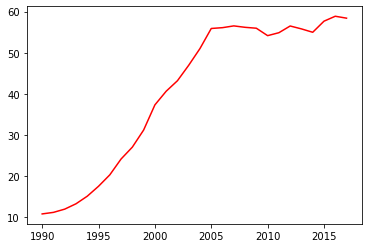

In [28]:
plt.plot(df_merged['year'], df_merged['mort_per_capita'], c="r")


In [29]:
df_merged['rgdppc'] 

0      74.640200
1      75.842482
2      76.588316
3      77.073816
4      78.871379
5      80.911947
6      83.364624
7      86.465789
8      89.333736
9      92.923561
10     95.839518
11     96.934364
12     96.410232
13     96.243472
14     98.025950
15    100.000000
16    103.294950
17    106.959193
18    108.855961
19    104.326422
20    105.186343
21    106.320913
22    104.836759
23    104.392064
24    105.497681
25    107.088867
26    108.855100
27    111.317906
Name: rgdppc, dtype: float64

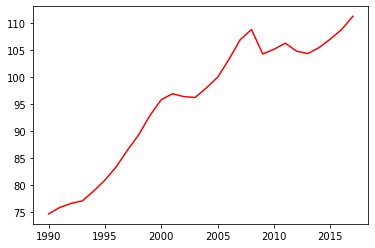

In [30]:
plt.plot(df_merged['year'], df_merged['rgdppc'], c="r")


In [31]:
#scaling house prices * 1000

df_merged['hpnom'] = df_merged['hpnom']
#df_merged['hpnom']

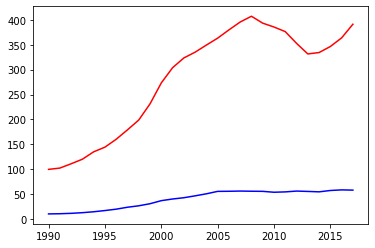

In [32]:
plt.plot(df_merged['year'], df_merged['hpnom'], c="r")
plt.plot(df_merged['year'], df_merged['mort_per_capita'], c="b")
#plt.plot(df_merged['year'],df_merged['proportion_working_population_to_total_population'], c="y")

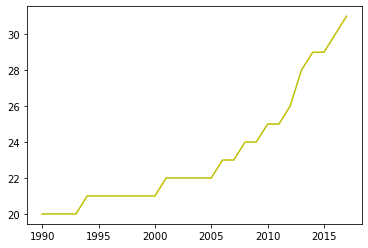

In [33]:
plt.plot(df_merged['year'],df_merged['GreyPressure_22'], c="y")

In [34]:
#deflating housing prices

df_merged['deflated_house_prices'] = df_merged['hpnom']/df_merged['cpi']*100

In [35]:
#converting nominal to real GDP
#deviding GDP per capita by 1000 to make it the same scale, then deflating GDP

# df_merged['rgdppc'] = (df_merged['GDP per capita (current US$)']/1000)/(df_merged['cpi']/100)

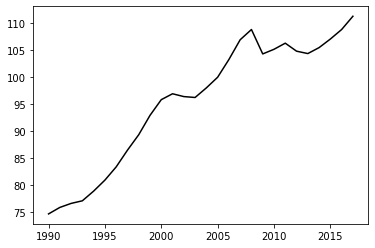

In [36]:
plt.plot(df_merged['year'],df_merged['rgdppc'], c="k")

In [37]:

df_merged['ltrate'] = +df_merged['ltrate']



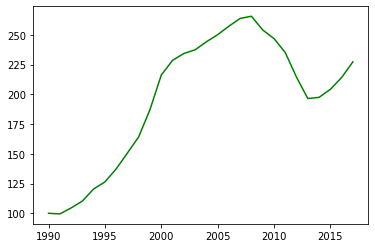

In [38]:
plt.plot(df_merged['year'],df_merged['deflated_house_prices'], c="g")

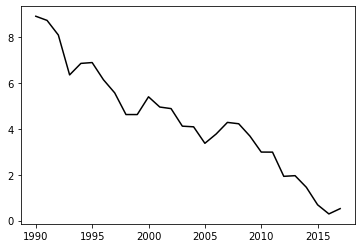

In [39]:
plt.plot(df_merged['year'],df_merged['ltrate'], c="k")

In [40]:
#taking first differences (meaning: d Y (t) = y (t) - y (t-1)) by using pandas .diff() method

df_merged['1stdiff_GreyPressure_22'] = df_merged['GreyPressure_22'].diff()
df_merged["1stdiff_tmort"] = df_merged["tmort"].diff()
df_merged["1stdiff_mort_per_capita"] = df_merged["mort_per_capita"].diff()
df_merged['1stdiff_rgdppc'] = df_merged['rgdppc'].diff()
df_merged['1stdiff_lev'] = df_merged['lev'].diff()
df_merged['1stdiff_ltd']= df_merged['ltd'].diff()
df_merged["1stdiff_deflated_house_prices"] = df_merged['deflated_house_prices'].diff()
df_merged['1stdiff_TotalPopulation_1'] = df_merged['TotalPopulation_1'].diff()

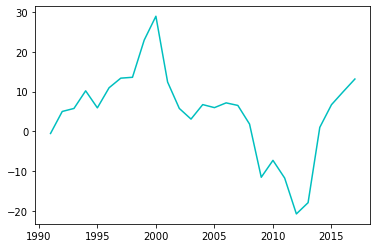

In [41]:
plt.plot(df_merged['year'],df_merged["1stdiff_deflated_house_prices"], c="c")



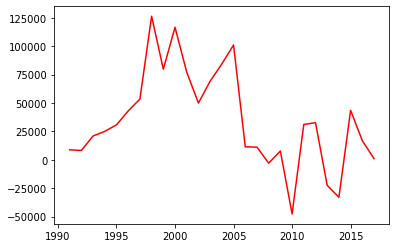

In [42]:
plt.plot(df_merged['year'],df_merged["1stdiff_tmort"], c="r")


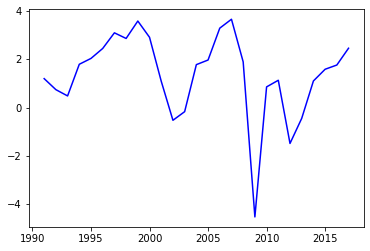

In [43]:
plt.plot(df_merged['year'],df_merged["1stdiff_rgdppc"], c="b")


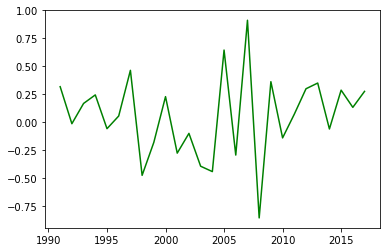

In [44]:
plt.plot(df_merged['year'],df_merged["1stdiff_lev"], c="g")


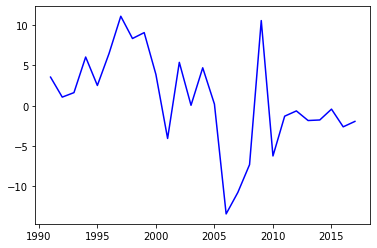

In [45]:
plt.plot(df_merged['year'],df_merged["1stdiff_ltd"], c="b")

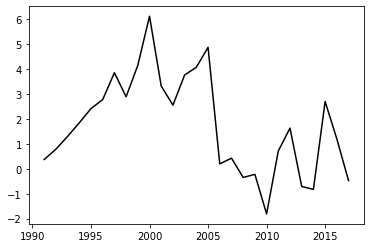

In [46]:
plt.plot(df_merged['year'],df_merged["mort_per_capita"].diff(), c="k")

In [47]:
for i in df_merged:
    print(i)

year
tmort
hpnom
rgdppc
cpi
lev
ltd
pop
ltrate
thh
TotalPopulation_1
TotalPopulation_4
YoungerThan20Years_10
YoungerThan20Years_10
k_20To40Years_11
k_40To65Years_12
k_65To80Years_13
k_80YearsOrOlder_14
YoungerThan20Years_15
k_20To40Years_16
k_40To65Years_17
k_65To80Years_18
k_80YearsOrOlder_19
TotalDemographicPressure_20
GreenPressure_21
GreyPressure_22
TotalPopulation_23
Males_24
Females_25
GDP per capita (current US$)
mort_per_capita
deflated_house_prices
1stdiff_GreyPressure_22
1stdiff_tmort
1stdiff_mort_per_capita
1stdiff_rgdppc
1stdiff_lev
1stdiff_ltd
1stdiff_deflated_house_prices
1stdiff_TotalPopulation_1


In [48]:
df_merged['1stdiff_GreyPressure_22']


0     NaN
1     0.0
2     0.0
3     0.0
4     1.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    1.0
12    0.0
13    0.0
14    0.0
15    0.0
16    1.0
17    0.0
18    1.0
19    0.0
20    1.0
21    0.0
22    1.0
23    2.0
24    1.0
25    0.0
26    1.0
27    1.0
Name: 1stdiff_GreyPressure_22, dtype: float64

In [49]:
df_merged['1stdiff_GreyPressure_22'].isna().sum()

1

In [50]:
df_merged_1stdiff = df_merged[['year',"1stdiff_deflated_house_prices",'1stdiff_GreyPressure_22',"1stdiff_tmort", '1stdiff_mort_per_capita','1stdiff_rgdppc','1stdiff_lev','1stdiff_ltd']]
df_merged_1stdiff

,year,1stdiff_deflated_house_prices,1stdiff_GreyPressure_22,1stdiff_tmort,1stdiff_mort_per_capita,1stdiff_rgdppc,1stdiff_lev,1stdiff_ltd
0,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991,-0.521946,0.0,8869.937500,0.375613,1.202283,0.316922,3.554291
2,1992,5.009305,0.0,8240.546800,0.788880,0.745833,-0.014580,1.071404
3,1993,5.764210,0.0,20986.812500,1.303735,0.485500,0.166861,1.628319
4,1994,10.194855,1.0,25067.203200,1.848390,1.797563,0.243189,6.051987
5,1995,5.916427,0.0,30808.531200,2.421419,2.040568,-0.059079,2.517387
6,1996,10.964430,0.0,43039.781300,2.782752,2.452677,0.054294,6.501053
7,1997,13.379324,0.0,53506.312500,3.862118,3.101166,0.463222,11.117226
8,1998,13.598029,0.0,126387.968700,2.894988,2.867946,-0.476712,8.351196
9,1999,22.934274,0.0,79803.750000,4.162381,3.589826,-0.181659,9.083885


In [51]:
#checking if first value in the series likely became nan because
#taking the difference between t(0) and t(0-1) gives a nan as result

for variable in df_merged_1stdiff.columns:
    print(f'Nans in {variable}: {df_merged_1stdiff[variable].isna().sum()}')
#turns out to be the case as 1 na value is found per variable so we will drop the first na value by taking: df_merged_1stdiff.dropna()

df_merged_1stdiff

Nans in year: 0
Nans in 1stdiff_deflated_house_prices: 1
Nans in 1stdiff_GreyPressure_22: 1
Nans in 1stdiff_tmort: 1
Nans in 1stdiff_mort_per_capita: 1
Nans in 1stdiff_rgdppc: 1
Nans in 1stdiff_lev: 1
Nans in 1stdiff_ltd: 1


,year,1stdiff_deflated_house_prices,1stdiff_GreyPressure_22,1stdiff_tmort,1stdiff_mort_per_capita,1stdiff_rgdppc,1stdiff_lev,1stdiff_ltd
0,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991,-0.521946,0.0,8869.937500,0.375613,1.202283,0.316922,3.554291
2,1992,5.009305,0.0,8240.546800,0.788880,0.745833,-0.014580,1.071404
3,1993,5.764210,0.0,20986.812500,1.303735,0.485500,0.166861,1.628319
4,1994,10.194855,1.0,25067.203200,1.848390,1.797563,0.243189,6.051987
5,1995,5.916427,0.0,30808.531200,2.421419,2.040568,-0.059079,2.517387
6,1996,10.964430,0.0,43039.781300,2.782752,2.452677,0.054294,6.501053
7,1997,13.379324,0.0,53506.312500,3.862118,3.101166,0.463222,11.117226
8,1998,13.598029,0.0,126387.968700,2.894988,2.867946,-0.476712,8.351196
9,1999,22.934274,0.0,79803.750000,4.162381,3.589826,-0.181659,9.083885


In [52]:
#dropping na values
df_merged_1stdiff_clean = df_merged_1stdiff.dropna()
df_merged_1stdiff_clean

,year,1stdiff_deflated_house_prices,1stdiff_GreyPressure_22,1stdiff_tmort,1stdiff_mort_per_capita,1stdiff_rgdppc,1stdiff_lev,1stdiff_ltd
1,1991,-0.521946,0.0,8869.937500,0.375613,1.202283,0.316922,3.554291
2,1992,5.009305,0.0,8240.546800,0.788880,0.745833,-0.014580,1.071404
3,1993,5.764210,0.0,20986.812500,1.303735,0.485500,0.166861,1.628319
4,1994,10.194855,1.0,25067.203200,1.848390,1.797563,0.243189,6.051987
5,1995,5.916427,0.0,30808.531200,2.421419,2.040568,-0.059079,2.517387
6,1996,10.964430,0.0,43039.781300,2.782752,2.452677,0.054294,6.501053
7,1997,13.379324,0.0,53506.312500,3.862118,3.101166,0.463222,11.117226
8,1998,13.598029,0.0,126387.968700,2.894988,2.867946,-0.476712,8.351196
9,1999,22.934274,0.0,79803.750000,4.162381,3.589826,-0.181659,9.083885
10,2000,28.938651,0.0,116636.312500,6.130146,2.915956,0.227811,3.890694


<b>
Using Augmented Dickey Fuller test with Hyptheses:
    
    
Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
    
Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

</b>



In [53]:
#taking results from df_merged["1stdiff_deflated_house_prices"][1:] skipping the first value

Stationary_series =[]
Non_stationairy_series = []

for variable in df_merged_1stdiff_clean.columns:
    print(f"Output results augmented Dickey Fuller test for variable: {variable}")
    results_augmented_dickey_fuller = adfuller(df_merged_1stdiff_clean[variable])
    print('ADF Statistic: %f' % results_augmented_dickey_fuller[0])
    print('p-value: %f' % results_augmented_dickey_fuller[1])
    print('Critical Values:')
    for key, value in results_augmented_dickey_fuller[4].items():
        print('\t%s: %.3f' % (key, value))

    if results_augmented_dickey_fuller[1] <= 0.05:
        print("Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary")
        Stationary_series.append(variable)
    else:
        print("Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary")
        Non_stationairy_series.append(variable)
        
print(f"-------------------------------------------------------------------------------------------------------------------------------Stationary_series: {Stationary_series}, Non_stationairy_series: {Non_stationairy_series}")


Output results augmented Dickey Fuller test for variable: year
ADF Statistic: -0.022166
p-value: 0.956660
Critical Values:
	1%: -3.770
	5%: -3.005
	10%: -2.643
Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary
Output results augmented Dickey Fuller test for variable: 1stdiff_deflated_house_prices
ADF Statistic: -1.991672
p-value: 0.290236
Critical Values:
	1%: -3.724
	5%: -2.986
	10%: -2.633
Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary
Output results augmented Dickey Fuller test for variable: 1stdiff_GreyPressure_22
ADF Statistic: -4.404589
p-value: 0.000291
Critical Values:
	1%: -3.711
	5%: -2.981
	10%: -2.630
Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary
Output results augmented Dickey Fuller test for variable: 1stdiff_tmort
ADF Statistic: -2.912481
p-value: 0.043916
Critical Value

In [54]:
#transforming variables to log:

for variable in df_merged_1stdiff_clean.columns:
    df_merged_1stdiff_clean[variable+str("_log_adjusted")]=np.log(df_merged_1stdiff_clean[variable])
df_merged_1stdiff_clean

<ipython-input-54-5e336c162519>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_1stdiff_clean[variable+str("_log_adjusted")]=np.log(df_merged_1stdiff_clean[variable])
C:\Users\Nitai Nijholt\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nitai Nijholt\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,year,1stdiff_deflated_house_prices,1stdiff_GreyPressure_22,1stdiff_tmort,1stdiff_mort_per_capita,1stdiff_rgdppc,1stdiff_lev,1stdiff_ltd,year_log_adjusted,1stdiff_deflated_house_prices_log_adjusted,1stdiff_GreyPressure_22_log_adjusted,1stdiff_tmort_log_adjusted,1stdiff_mort_per_capita_log_adjusted,1stdiff_rgdppc_log_adjusted,1stdiff_lev_log_adjusted,1stdiff_ltd_log_adjusted
1,1991,-0.521946,0.0,8869.937500,0.375613,1.202283,0.316922,3.554291,7.596392,NaN,-inf,9.090423,-0.979196,0.184222,-1.149099,1.268156
2,1992,5.009305,0.0,8240.546800,0.788880,0.745833,-0.014580,1.071404,7.596894,1.611297,-inf,9.016822,-0.237140,-0.293253,NaN,0.068969
3,1993,5.764210,0.0,20986.812500,1.303735,0.485500,0.166861,1.628319,7.597396,1.751668,-inf,9.951650,0.265233,-0.722576,-1.790597,0.487548
4,1994,10.194855,1.0,25067.203200,1.848390,1.797563,0.243189,6.051987,7.597898,2.321883,0.000000,10.129316,0.614315,0.586432,-1.413915,1.800387
5,1995,5.916427,0.0,30808.531200,2.421419,2.040568,-0.059079,2.517387,7.598399,1.777733,-inf,10.335547,0.884354,0.713228,NaN,0.923222
6,1996,10.964430,0.0,43039.781300,2.782752,2.452677,0.054294,6.501053,7.598900,2.394656,-inf,10.669880,1.023440,0.897180,-2.913340,1.871964
7,1997,13.379324,0.0,53506.312500,3.862118,3.101166,0.463222,11.117226,7.599401,2.593710,-inf,10.887555,1.351216,1.131778,-0.769549,2.408496
8,1998,13.598029,0.0,126387.968700,2.894988,2.867946,-0.476712,8.351196,7.599902,2.609925,-inf,11.747112,1.062981,1.053596,NaN,2.122405
9,1999,22.934274,0.0,79803.750000,4.162381,3.589826,-0.181659,9.083885,7.600402,3.132632,-inf,11.287326,1.426087,1.278104,NaN,2.206502
10,2000,28.938651,0.0,116636.312500,6.130146,2.915956,0.227811,3.890694,7.600902,3.365178,-inf,11.666816,1.813219,1.070198,-1.479237,1.358587


In [55]:
#log transformations and 2nd order differncing

df_merged['1stdiff_GreyPressure_22_log_transformed'] = np.log(df_merged['GreyPressure_22']).diff().diff()
df_merged["1stdiff_tmort_log_transformed"] = np.log(df_merged["tmort"]).diff().diff()
df_merged["1stdiff_mort_per_capita_log_transformed"] = np.log(df_merged["mort_per_capita"]).diff().diff()
df_merged['1stdiff_rgdppc_log_transformed'] = np.log(df_merged['rgdppc']).diff().diff()
df_merged['1stdiff_lev_log_transformed'] = np.log(df_merged['lev']).diff().diff()
df_merged['1stdiff_ltd_log_transformed']= np.log(df_merged['ltd']).diff().diff()
df_merged["1stdiff_deflated_house_prices_log_transformed"] = np.log(df_merged['deflated_house_prices']).diff().diff()
df_merged["1stdiff_ltrate"] = df_merged['ltrate'].diff().diff()

#took both log, percentage changed and differences for the following variable
df_merged["1stdiff_TotalPopulation_1_transformed"]=np.log(df_merged['TotalPopulation_1']).diff().diff()

In [56]:
#creating dataframe with only log tranformed variables

#"1stdiff_max_mortgage"

df_merged_logtransformed = df_merged[['year','1stdiff_GreyPressure_22_log_transformed',
       '1stdiff_tmort_log_transformed',
       '1stdiff_mort_per_capita_log_transformed',
       '1stdiff_rgdppc_log_transformed',
       '1stdiff_lev_log_transformed', '1stdiff_ltd_log_transformed',
       '1stdiff_deflated_house_prices_log_transformed',"1stdiff_TotalPopulation_1_transformed","1stdiff_ltrate"]].dropna()


df_merged_logtransformed

,year,1stdiff_GreyPressure_22_log_transformed,1stdiff_tmort_log_transformed,1stdiff_mort_per_capita_log_transformed,1stdiff_rgdppc_log_transformed,1stdiff_lev_log_transformed,1stdiff_ltd_log_transformed,1stdiff_deflated_house_prices_log_transformed,1stdiff_TotalPopulation_1_transformed,1stdiff_ltrate
2,1992,0.000000,-0.007769,0.034299,-0.006193,-0.073668,-0.031642,0.054362,-0.000007,-0.456680
3,1993,0.000000,0.072659,0.035450,-0.003467,0.038474,0.006489,0.004570,-0.000631,-1.102490
4,1994,0.048790,0.006135,0.027093,0.016736,0.014026,0.050040,0.034742,-0.000551,2.243330
5,1995,-0.048790,0.009371,0.018146,0.002488,-0.061132,-0.042038,-0.040488,-0.001328,-0.465830
6,1996,0.000000,0.027711,-0.001438,0.004319,0.022591,0.040333,0.035257,-0.000855,-0.785840
7,1997,0.000000,0.007510,0.026734,0.006662,0.077032,0.038506,0.009758,0.000201,0.175000
8,1998,0.000000,0.147938,-0.061272,-0.003894,-0.178385,-0.033328,-0.006581,0.000864,-0.371660
9,1999,0.000000,-0.164310,0.029968,0.006768,0.053755,0.000779,0.044276,0.001172,0.945000
10,2000,0.000000,0.035690,0.036213,-0.008500,0.082684,-0.043836,0.013052,-0.000191,0.775830
11,2001,0.046520,-0.085564,-0.094209,-0.019539,-0.102189,-0.061453,-0.087935,0.001171,-1.221670


In [57]:
#ADF tests

Stationary_series =[]
Non_stationairy_series = []

for variable in df_merged_logtransformed.columns:
    print(f"Output results augmented Dickey Fuller test for variable: {variable}")
    results_augmented_dickey_fuller = adfuller(df_merged_logtransformed[variable][1:])
    print('ADF Statistic: %f' % results_augmented_dickey_fuller[0])
    print('p-value: %f' % results_augmented_dickey_fuller[1])
    print('Critical Values:')
    for key, value in results_augmented_dickey_fuller[4].items():
        print('\t%s: %.3f' % (key, value))

    if results_augmented_dickey_fuller[1] <= 0.05:
        print("Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary")
        Stationary_series.append(variable)
    else:
        print("Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary")
        Non_stationairy_series.append(variable)
        
print(f"-------------------------------------------------------------------------------------------------------------------------------Stationary_series: {Stationary_series}, Non_stationairy_series: {Non_stationairy_series}")


Output results augmented Dickey Fuller test for variable: year
ADF Statistic: -0.038225
p-value: 0.955254
Critical Values:
	1%: -3.809
	5%: -3.022
	10%: -2.651
Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary
Output results augmented Dickey Fuller test for variable: 1stdiff_GreyPressure_22_log_transformed
ADF Statistic: -1.216488
p-value: 0.666463
Critical Values:
	1%: -3.964
	5%: -3.085
	10%: -2.682
Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary
Output results augmented Dickey Fuller test for variable: 1stdiff_tmort_log_transformed
ADF Statistic: -0.152872
p-value: 0.943911
Critical Values:
	1%: -3.964
	5%: -3.085
	10%: -2.682
Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary
Output results augmented Dickey Fuller test for variable: 1stdiff_mort_per_capita_log_transformed
ADF Statistic:

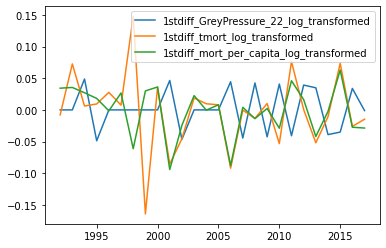

In [58]:
plt.plot(df_merged_logtransformed['year'], df_merged_logtransformed[['1stdiff_GreyPressure_22_log_transformed', '1stdiff_tmort_log_transformed', '1stdiff_mort_per_capita_log_transformed']])
plt.legend(['1stdiff_GreyPressure_22_log_transformed', '1stdiff_tmort_log_transformed', '1stdiff_mort_per_capita_log_transformed'])

In [59]:
#Transform the 'years' variabe to the correct time datatype (namely: pd.core.indexes.datetimes.DatetimeIndex) and setting the dataframe's index equal to it. This is necesarry for any time series modelling.

print(df_merged_logtransformed.index)

dates = df_merged_logtransformed.year.astype(int).astype(str)

print(dates)

from statsmodels.tsa.base.datetools import dates_from_str

time_series_ready_dates = dates_from_str(dates)
time_series_ready_dates


df_merged_logtransformed.index = pd.DatetimeIndex(time_series_ready_dates, freq='A-DEC')

print(df_merged_logtransformed.index)


if type(df_merged_logtransformed.index) == pd.core.indexes.datetimes.DatetimeIndex:
    print('Datatype of years succesfully changed to pd.core.indexes.datetimes.DatetimeIndex')

Int64Index([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19, 20, 21, 22, 23, 24, 25, 26, 27],
           dtype='int64')
2     1992
3     1993
4     1994
5     1995
6     1996
7     1997
8     1998
9     1999
10    2000
11    2001
12    2002
13    2003
14    2004
15    2005
16    2006
17    2007
18    2008
19    2009
20    2010
21    2011
22    2012
23    2013
24    2014
25    2015
26    2016
27    2017
Name: year, dtype: object
DatetimeIndex(['1992-12-31', '1993-12-31', '1994-12-31', '1995-12-31',
               '1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31',
               '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')
Datatype of

year


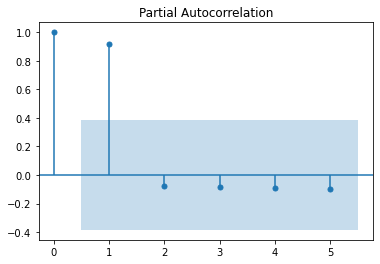

1stdiff_GreyPressure_22_log_transformed


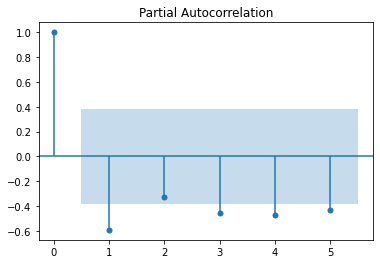

1stdiff_tmort_log_transformed


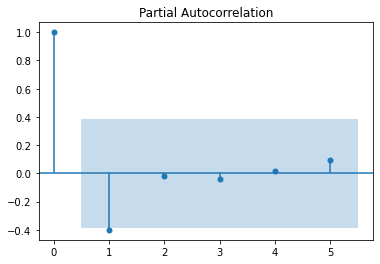

1stdiff_mort_per_capita_log_transformed


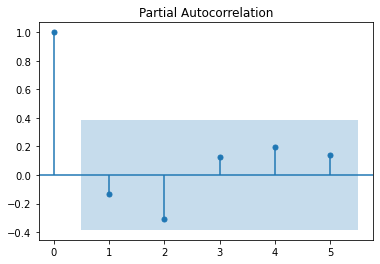

1stdiff_rgdppc_log_transformed


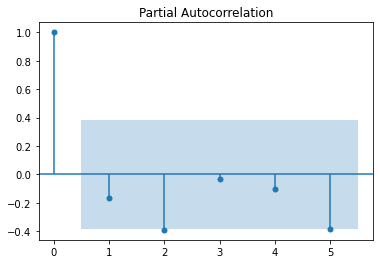

1stdiff_lev_log_transformed


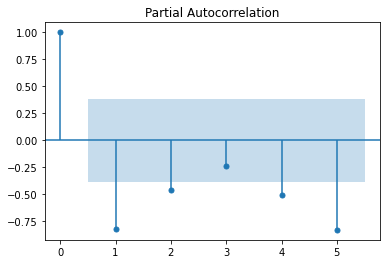

1stdiff_ltd_log_transformed


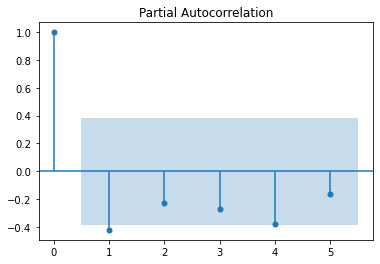

1stdiff_deflated_house_prices_log_transformed


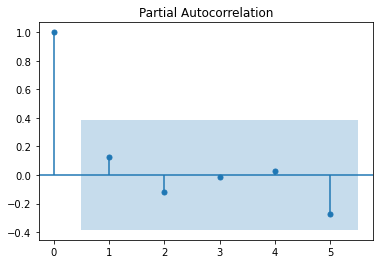

1stdiff_TotalPopulation_1_transformed


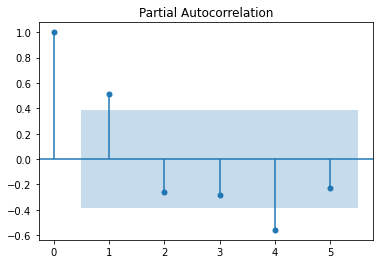

1stdiff_ltrate


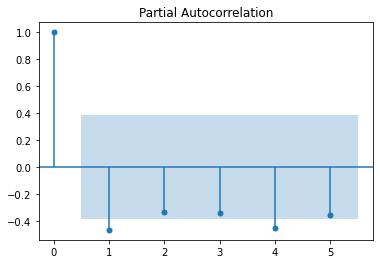

In [60]:
#testing partial auto correlations
for variable in df_merged_logtransformed.columns:
    plot_pacf(df_merged_logtransformed[variable], lags = 5)
    print(variable)
    plt.show()

year


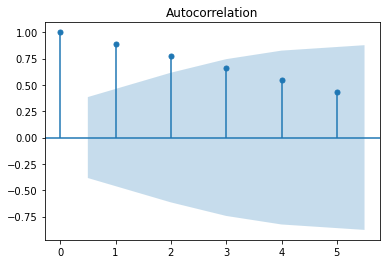

1stdiff_GreyPressure_22_log_transformed


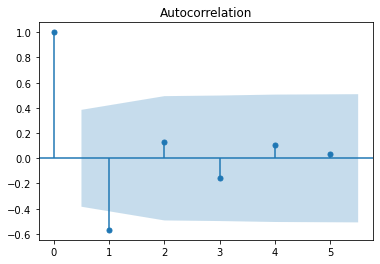

1stdiff_tmort_log_transformed


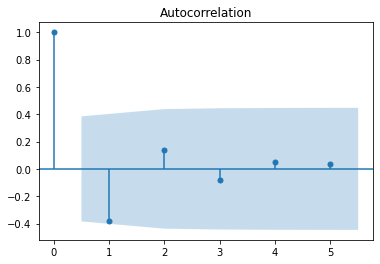

1stdiff_mort_per_capita_log_transformed


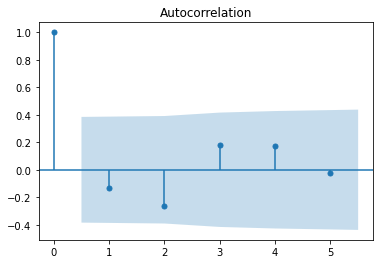

1stdiff_rgdppc_log_transformed


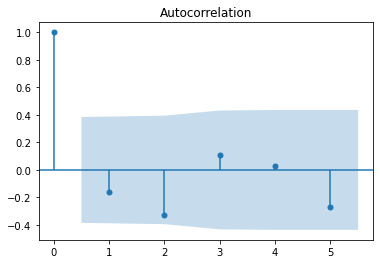

1stdiff_lev_log_transformed


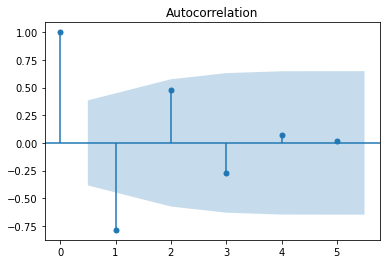

1stdiff_ltd_log_transformed


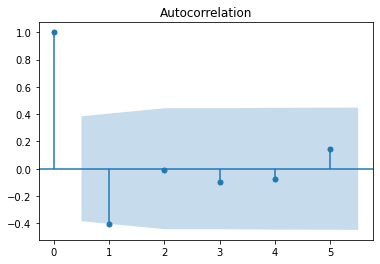

1stdiff_deflated_house_prices_log_transformed


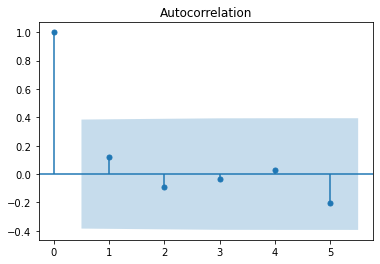

1stdiff_TotalPopulation_1_transformed


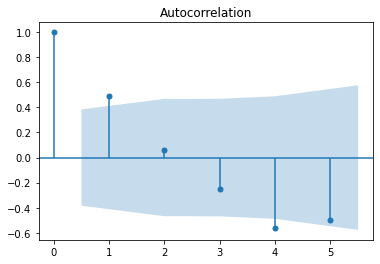

1stdiff_ltrate


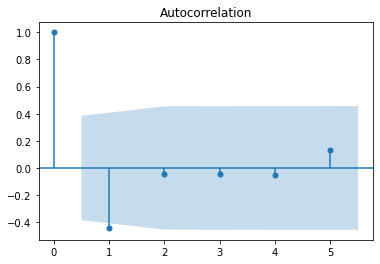

In [61]:
for variable in df_merged_logtransformed.columns:
    plot_acf(df_merged_logtransformed[variable], lags = 5)
    print(variable)
    plt.show()

In [62]:
df_merged_logtransformed.columns

Index(['year', '1stdiff_GreyPressure_22_log_transformed',
       '1stdiff_tmort_log_transformed',
       '1stdiff_mort_per_capita_log_transformed',
       '1stdiff_rgdppc_log_transformed', '1stdiff_lev_log_transformed',
       '1stdiff_ltd_log_transformed',
       '1stdiff_deflated_house_prices_log_transformed',
       '1stdiff_TotalPopulation_1_transformed', '1stdiff_ltrate'],
      dtype='object')

In [63]:
df_merged_logtransformed =df_merged_logtransformed.drop(['year','1stdiff_tmort_log_transformed','1stdiff_TotalPopulation_1_transformed', '1stdiff_lev_log_transformed',
       '1stdiff_ltd_log_transformed'],axis=1)

In [64]:
df_merged_logtransformed.columns

Index(['1stdiff_GreyPressure_22_log_transformed',
       '1stdiff_mort_per_capita_log_transformed',
       '1stdiff_rgdppc_log_transformed',
       '1stdiff_deflated_house_prices_log_transformed', '1stdiff_ltrate'],
      dtype='object')

In [65]:
modelVAR = VAR(df_merged_logtransformed)


In [66]:
modelVAR.select_order(maxlags = 3).summary()

,AIC,BIC,FPE,HQIC
0,-29.31,-29.07*,1.859e-13,-29.25
1,-29.81,-28.33,1.199e-13*,-29.44
2,-30.11,-27.39,1.285e-13,-29.42
3,-30.93*,-26.98,1.893e-13,-29.93*


In [67]:
#estimating VAR with lag order 3

results = modelVAR.fit(3)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 30, Jun, 2022
Time:                     12:49:11
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -26.9775
Nobs:                     23.0000    HQIC:                  -29.9338
Log likelihood:           272.483    FPE:                1.89320e-13
AIC:                     -30.9271    Det(Omega_mle):     1.35056e-14
--------------------------------------------------------------------
Results for equation 1stdiff_GreyPressure_22_log_transformed
                                                      coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------------------------------
const                                                    0.001451         0.006092            0.238           0.812
L1

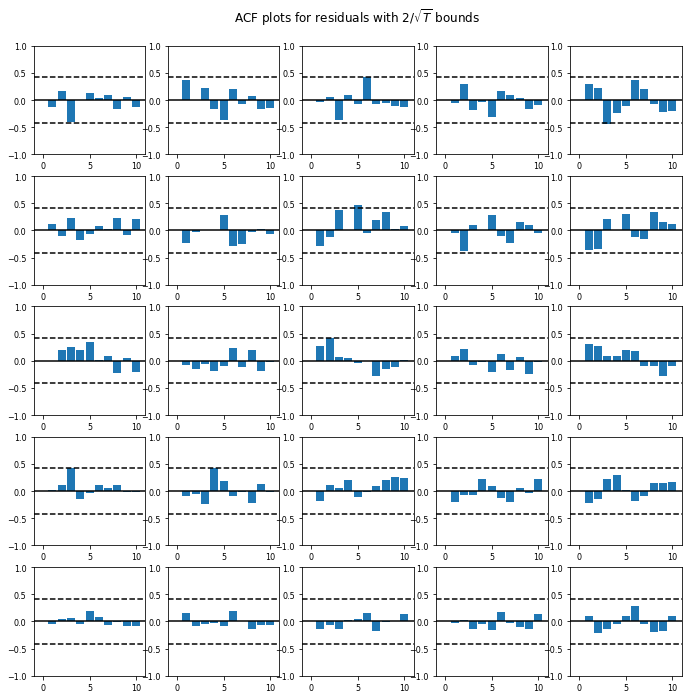

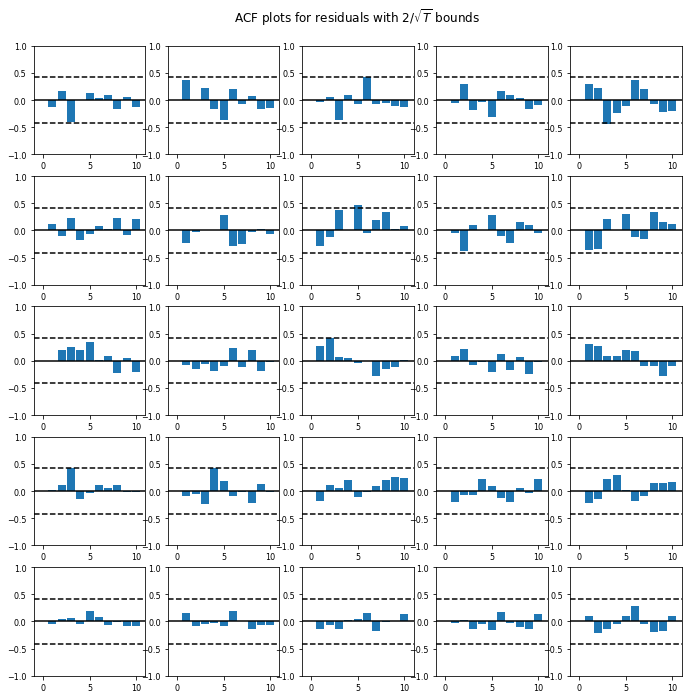

In [68]:
results.plot_acorr()

In [69]:
#results indicate significant residual auto correlation

results.test_whiteness().summary()

Test statistic,Critical value,p-value,df
218.7,206.9,0.014,175


In [70]:
#Normality looks okay

results.test_normality().summary()

Test statistic,Critical value,p-value,df
6.022,18.31,0.813,10


In [71]:
#printing skewness per variable

Skewed_variables = []
Kurtosis_conaining_variables = []

for i in df_merged_logtransformed.columns:
    print(df_merged_logtransformed[i].describe())
    print(f'Kurtosis: {df_merged_logtransformed[i].kurtosis()}')
    print(f'Skewness: {df_merged_logtransformed[i].skew()}')
    if df_merged_logtransformed[i].kurtosis() <= -10 or df_merged_logtransformed[i].kurtosis() >= 10:
        Kurtosis_conaining_variables.append(i)
    else: 
        continue
    if df_merged_logtransformed[i].skew() >= 3 or df_merged_logtransformed[i].skew() <= -3:
        Skewed_variables.append(i)


if len (Skewed_variables) == 0:
        print(f'all variables have skewness in acceptable ranges (-3 < skewness < 3)')
if len (Kurtosis_conaining_variables) == 0:
        print(f'all variables have kurtosis in acceptable ranges (-10 < kurtosis < 10)')

count    26.000000
mean      0.001261
std       0.032628
min      -0.048790
25%      -0.026596
50%       0.000000
75%       0.034641
max       0.048790
Name: 1stdiff_GreyPressure_22_log_transformed, dtype: float64
Kurtosis: -1.1667502297249532
Skewness: -0.0768449169463409
count    26.000000
mean     -0.001635
std       0.039292
min      -0.094209
25%      -0.026610
50%       0.003142
75%       0.027003
max       0.062938
Name: 1stdiff_mort_per_capita_log_transformed, dtype: float64
Kurtosis: 0.37828785443030855
Skewness: -0.8189941102394259
count    26.000000
mean      0.000246
std       0.019234
min      -0.060079
25%      -0.005619
50%       0.002504
75%       0.006741
max       0.050710
Name: 1stdiff_rgdppc_log_transformed, dtype: float64
Kurtosis: 4.323222545018165
Skewness: -0.6504244200485478
count    26.000000
mean      0.002495
std       0.036579
min      -0.087935
25%      -0.016541
50%       0.004827
75%       0.015192
max       0.092380
Name: 1stdiff_deflated_house_prices_l

In [72]:
#this code is for creating the exogenous lags.

x = df_merged_logtransformed[['1stdiff_GreyPressure_22_log_transformed']]
x_list = [] 

for q in range(2):
    x_lagged = x.shift(q).bfill()
    x_list.append(x_lagged)
    
x_lag = pd.concat(x_list,axis=1)

list_of_columns = []

for i in range(2):
    list_of_columns.append(x_lag.columns[i])   
#This code is changing the name of the columns (meaning the variables) seperately to denote which lag it is in the title, for consistent varaibel naming.
renamed_list_of_columns = []
c = 2
for i in list_of_columns:
    c += 1
    z = c //2
    i = f'L{z}.{i}'
    renamed_list_of_columns.append(i)
    
x_lag.columns= renamed_list_of_columns
x_lag

,L1.1stdiff_GreyPressure_22_log_transformed,L2.1stdiff_GreyPressure_22_log_transformed
1992-12-31,0.000000,0.000000
1993-12-31,0.000000,0.000000
1994-12-31,0.048790,0.000000
1995-12-31,-0.048790,0.048790
1996-12-31,0.000000,-0.048790
1997-12-31,0.000000,0.000000
1998-12-31,0.000000,0.000000
1999-12-31,0.000000,0.000000
2000-12-31,0.000000,0.000000
2001-12-31,0.046520,0.000000


In [73]:
df_merged_logtransformed.columns

Index(['1stdiff_GreyPressure_22_log_transformed',
       '1stdiff_mort_per_capita_log_transformed',
       '1stdiff_rgdppc_log_transformed',
       '1stdiff_deflated_house_prices_log_transformed', '1stdiff_ltrate'],
      dtype='object')

In [74]:
exog=x_lag
endog=df_merged_logtransformed[['1stdiff_mort_per_capita_log_transformed',
       '1stdiff_rgdppc_log_transformed',
       '1stdiff_deflated_house_prices_log_transformed', '1stdiff_ltrate']]
modelVARX = VARMAX(endog=endog , order=(2,0),exog=exog)
resultsVARX = modelVARX.fit(maxiter=4000)
resultsVARX.summary()

C:\Users\Nitai Nijholt\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Dep. Variable:,"['1stdiff_mort_per_capita_log_transformed', '1stdiff_rgdppc_log_transformed', '1stdiff_deflated_house_prices_log_transformed', '1stdiff_ltrate']",No. Observations:,26
Model:,VARX(2),Log Likelihood,182.752
,+ intercept,AIC,-257.504
Date:,"Thu, 30 Jun 2022",BIC,-189.567
Time:,12:49:21,HQIC,-237.941
Sample:,12-31-1992,,
,- 12-31-2017,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"0.05, 0.22, 0.25, 1.20",Jarque-Bera (JB):,"1.77, 1.52, 11.10, 0.13"
Prob(Q):,"0.82, 0.64, 0.62, 0.27",Prob(JB):,"0.41, 0.47, 0.00, 0.94"
Heteroskedasticity (H):,"0.12, 3.62, 1.36, 0.32",Skew:,"-0.48, -0.54, 1.03, 0.04"


In [75]:
#

In [78]:
#subsetting dataframe to only look at variables of intrest, in untransformed form.

df_merged_subset=df_merged[['GreyPressure_22',
       'mort_per_capita',
       'rgdppc',
       'deflated_house_prices','ltrate']].dropna()

In [79]:
#Correlation matrix
corr = df_merged_subset.corr()
corr
# corr.style.background_gradient(cmap='coolwarm')

,GreyPressure_22,mort_per_capita,rgdppc,deflated_house_prices,ltrate
GreyPressure_22,1.000000,0.746121,0.784117,0.450079,-0.898038
mort_per_capita,0.746121,1.000000,0.981745,0.913992,-0.888197
rgdppc,0.784117,0.981745,1.000000,0.893944,-0.904838
deflated_house_prices,0.450079,0.913992,0.893944,1.000000,-0.686081
ltrate,-0.898038,-0.888197,-0.904838,-0.686081,1.000000


Text(0.5, 1.0, 'ltrate')

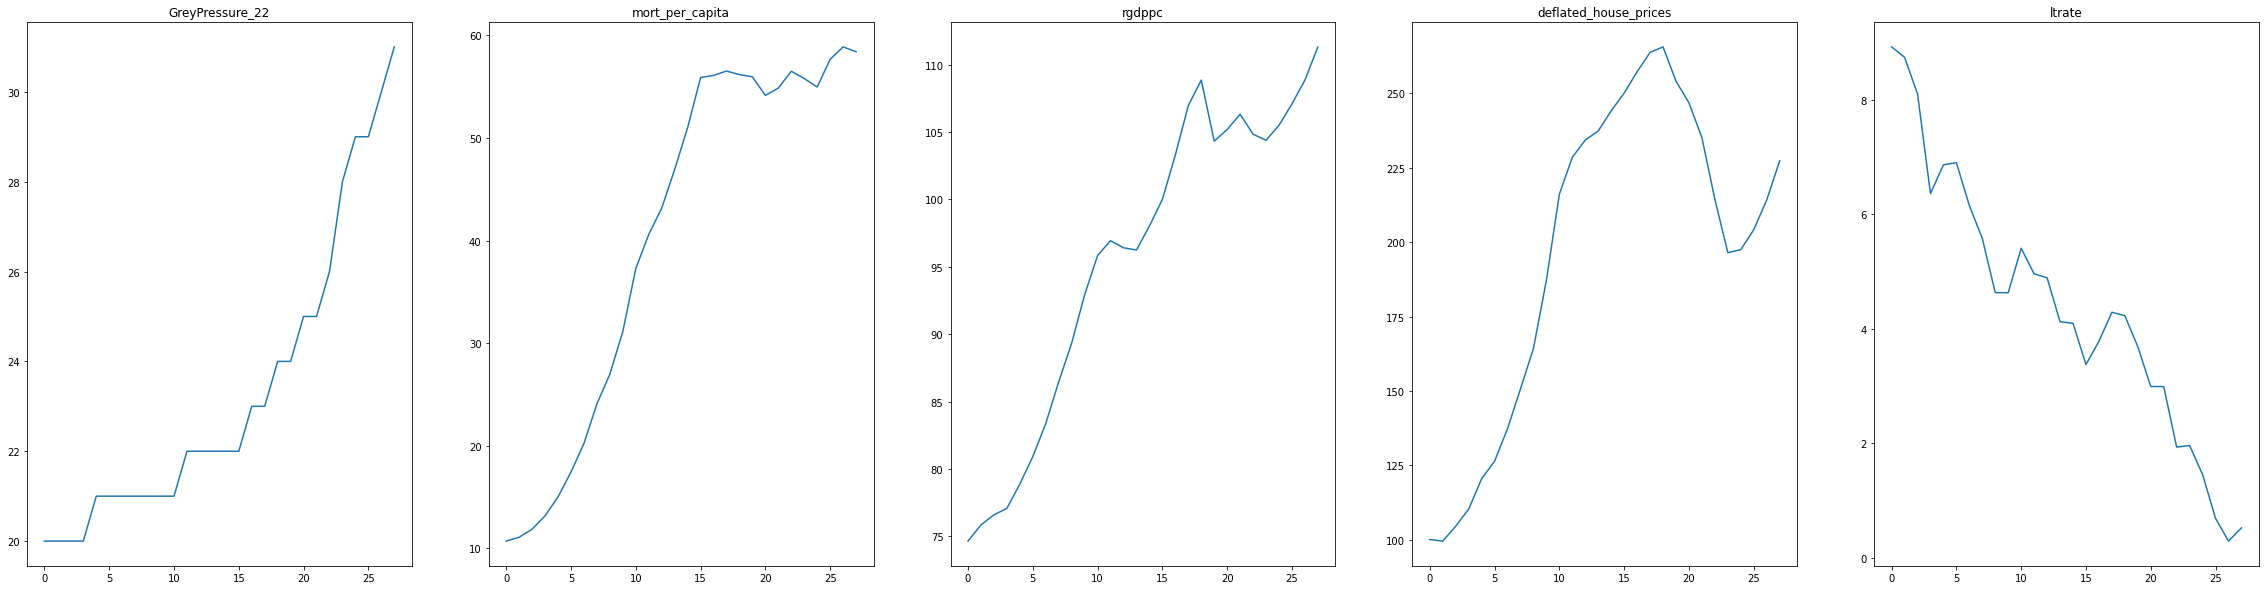

In [80]:
#plotting

fig, axes = plt.subplots(1, 5, figsize=(40, 10))

axes[0].plot(df_merged_subset.index,df_merged_subset["GreyPressure_22"])
axes[0].set_title('GreyPressure_22')
axes[1].plot(df_merged_subset.index,df_merged_subset["mort_per_capita"])
axes[1].set_title('mort_per_capita')
axes[2].plot(df_merged_subset.index,df_merged_subset["rgdppc"])
axes[2].set_title('rgdppc')
axes[3].plot(df_merged_subset.index,df_merged_subset["deflated_house_prices"])
axes[3].set_title('deflated_house_prices')
axes[4].plot(df_merged_subset.index,df_merged_subset["ltrate"])
axes[4].set_title('ltrate')


In [81]:
corr = df_merged_subset.corr()
corr

,GreyPressure_22,mort_per_capita,rgdppc,deflated_house_prices,ltrate
GreyPressure_22,1.000000,0.746121,0.784117,0.450079,-0.898038
mort_per_capita,0.746121,1.000000,0.981745,0.913992,-0.888197
rgdppc,0.784117,0.981745,1.000000,0.893944,-0.904838
deflated_house_prices,0.450079,0.913992,0.893944,1.000000,-0.686081
ltrate,-0.898038,-0.888197,-0.904838,-0.686081,1.000000


In [82]:
#taking untransformed data and tranforming to unstransformed data to log
df_merged_subset=np.log(df_merged[['GreyPressure_22',
       'mort_per_capita',
       'rgdppc',
       'deflated_house_prices']]).dropna()


df_merged_subset['ltrate'] = df_merged['ltrate'].dropna()

In [83]:
corr = df_merged_subset.corr()
corr

,GreyPressure_22,mort_per_capita,rgdppc,deflated_house_prices,ltrate
GreyPressure_22,1.000000,0.723787,0.794335,0.526345,-0.911084
mort_per_capita,0.723787,1.000000,0.983253,0.959259,-0.883507
rgdppc,0.794335,0.983253,1.000000,0.925058,-0.903374
deflated_house_prices,0.526345,0.959259,0.925058,1.000000,-0.735667
ltrate,-0.911084,-0.883507,-0.903374,-0.735667,1.000000


In [84]:
df_merged_subset= df_merged_subset.dropna()

In [85]:
Skewed_variables = []
Kurtosis_conaining_variables = []

for i in df_merged_subset.columns:
    print(df_merged_subset[i].describe())
    print(f'Kurtosis: {df_merged_subset[i].kurtosis()}')
    print(f'Skewness: {df_merged_subset[i].skew()}')
    if df_merged_subset[i].kurtosis() <= -10 or df_merged_subset[i].kurtosis() >= 10:
        Kurtosis_conaining_variables.append(i)
    else: 
        continue
    if df_merged_subset[i].skew() >= 3 or df_merged_subset[i].skew() <= -3:
        Skewed_variables.append(i)


if len (Skewed_variables) == 0:
        print(f'all variables have skewness in ranges (-3 < skewness < 3)')
if len (Kurtosis_conaining_variables) == 0:
        print(f'all variables have kurtosis in ranges (-10 < kurtosis < 10)')

count    28.000000
mean      3.141954
std       0.133776
min       2.995732
25%       3.044522
50%       3.091042
75%       3.218876
max       3.433987
Name: GreyPressure_22, dtype: float64
Kurtosis: -0.33001603262413015
Skewness: 0.9168369881381608
count    28.000000
mean      3.556390
std       0.602915
min       2.370350
25%       3.137854
50%       3.890324
75%       4.025174
max       4.075419
Name: mort_per_capita, dtype: float64
Kurtosis: -0.7065429941616337
Skewness: -0.9286490802993479
count    28.000000
mean      4.552163
std       0.129534
min       4.312679
25%       4.450618
50%       4.579633
75%       4.656472
max       4.712390
Name: rgdppc, dtype: float64
Kurtosis: -0.993423399280855
Skewness: -0.6738528946497719
count    28.000000
mean      5.231240
std       0.327431
min       4.599937
25%       4.992093
50%       5.367295
75%       5.476894
max       5.582247
Name: deflated_house_prices, dtype: float64
Kurtosis: -0.7183135474816726
Skewness: -0.8604028026291224
coun

Text(0.5, 1.0, 'ltrate')

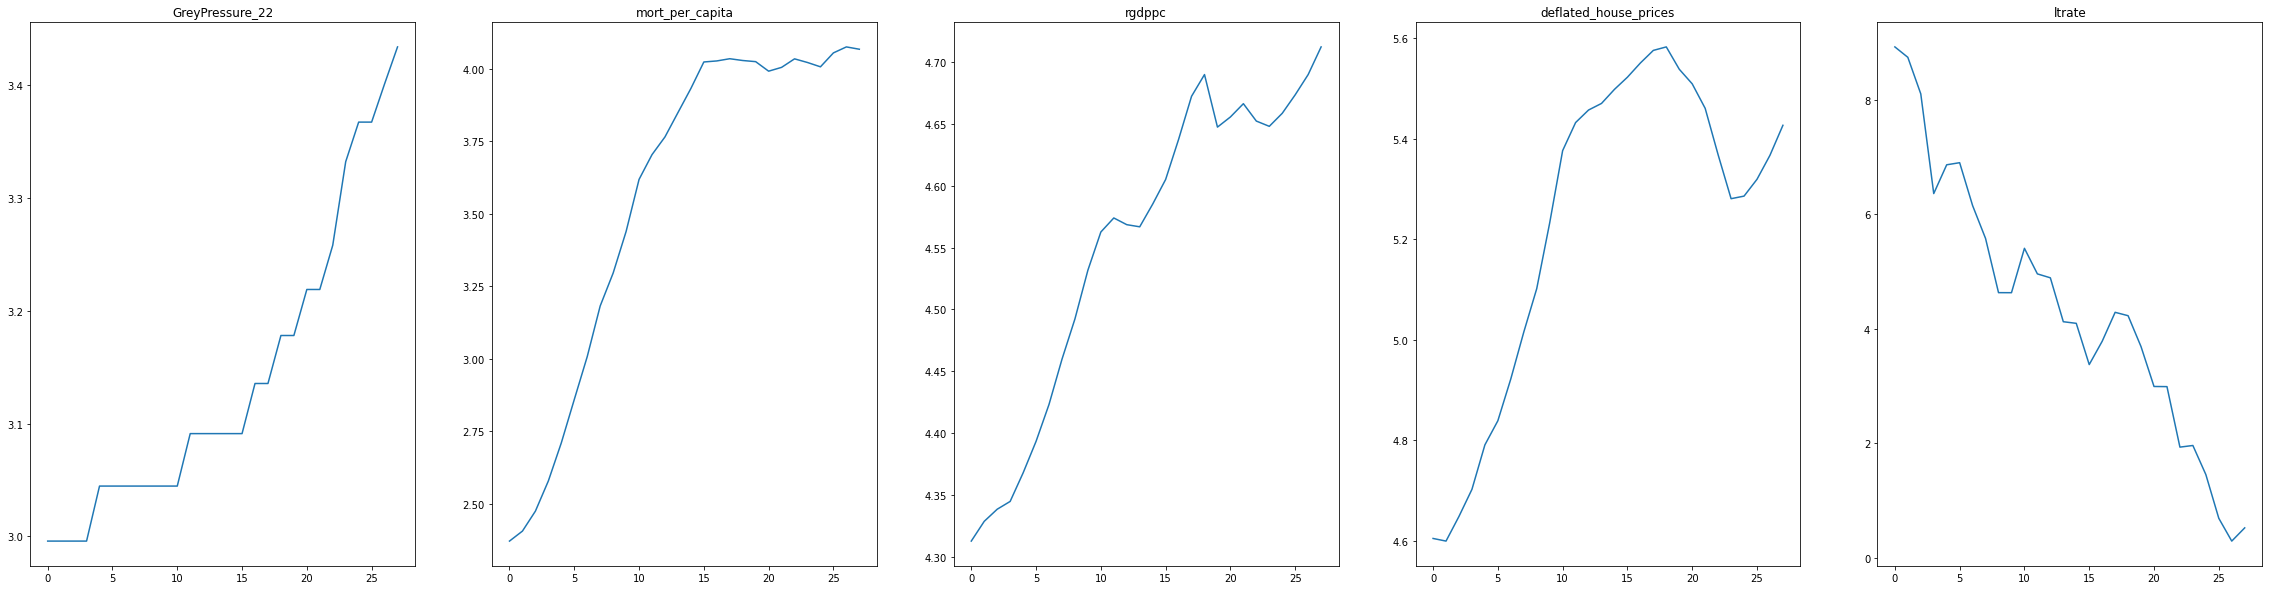

In [86]:
fig, axes = plt.subplots(1, 5, figsize=(40, 10))

axes[0].plot(df_merged_subset.index,df_merged_subset["GreyPressure_22"])
axes[0].set_title('GreyPressure_22')
axes[1].plot(df_merged_subset.index,df_merged_subset["mort_per_capita"])
axes[1].set_title('mort_per_capita')
axes[2].plot(df_merged_subset.index,df_merged_subset["rgdppc"])
axes[2].set_title('rgdppc')
axes[3].plot(df_merged_subset.index,df_merged_subset["deflated_house_prices"])
axes[3].set_title('deflated_house_prices')
axes[4].plot(df_merged_subset.index,df_merged_subset["ltrate"])
axes[4].set_title('ltrate')



In [87]:
#ADF test on log transformed variables

dataframe = df_merged_subset
Stationary_series =[]
Non_stationairy_series = []

for variable in dataframe.columns:
    print(f"Output results augmented Dickey Fuller test for variable: {variable}")
    results_augmented_dickey_fuller = adfuller(dataframe[variable][1:])
    print('ADF Statistic: %f' % results_augmented_dickey_fuller[0])
    print('p-value: %f' % results_augmented_dickey_fuller[1])
    print('Critical Values:')
    for key, value in results_augmented_dickey_fuller[4].items():
        print('\t%s: %.3f' % (key, value))

    if results_augmented_dickey_fuller[1] <= 0.05:
        print("Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary")
        Stationary_series.append(variable)
    else:
        print("Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary")
        Non_stationairy_series.append(variable)
        
print(f"-------------------------------------------------------------------------------------------------------------------------------Stationary_series: {Stationary_series}, Non_stationairy_series: {Non_stationairy_series}")


Output results augmented Dickey Fuller test for variable: GreyPressure_22
ADF Statistic: 2.968841
p-value: 1.000000
Critical Values:
	1%: -3.770
	5%: -3.005
	10%: -2.643
Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary
Output results augmented Dickey Fuller test for variable: mort_per_capita
ADF Statistic: -5.305906
p-value: 0.000005
Critical Values:
	1%: -3.711
	5%: -2.981
	10%: -2.630
Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary
Output results augmented Dickey Fuller test for variable: rgdppc
ADF Statistic: -1.933879
p-value: 0.316295
Critical Values:
	1%: -3.711
	5%: -2.981
	10%: -2.630
Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary
Output results augmented Dickey Fuller test for variable: deflated_house_prices
ADF Statistic: -2.415228
p-value: 0.137485
Critical Values:
	1%: -3.72

In [88]:
#Some variables appear to be I(2) after differencing

dataframe = df_merged_subset.diff()
Stationary_series =[]
Non_stationairy_series = []

for variable in dataframe.columns:
    print(f"Output results augmented Dickey Fuller test for variable: {variable}")
    results_augmented_dickey_fuller = adfuller(dataframe[variable][1:])
    print('ADF Statistic: %f' % results_augmented_dickey_fuller[0])
    print('p-value: %f' % results_augmented_dickey_fuller[1])
    print('Critical Values:')
    for key, value in results_augmented_dickey_fuller[4].items():
        print('\t%s: %.3f' % (key, value))

    if results_augmented_dickey_fuller[1] <= 0.05:
        print("Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary")
        Stationary_series.append(variable)
    else:
        print("Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary")
        Non_stationairy_series.append(variable)
        
print(f"-------------------------------------------------------------------------------------------------------------------------------Stationary_series: {Stationary_series}, Non_stationairy_series: {Non_stationairy_series}")


Output results augmented Dickey Fuller test for variable: GreyPressure_22
ADF Statistic: -4.978316
p-value: 0.000024
Critical Values:
	1%: -3.711
	5%: -2.981
	10%: -2.630
Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary
Output results augmented Dickey Fuller test for variable: mort_per_capita
ADF Statistic: -1.391880
p-value: 0.586163
Critical Values:
	1%: -3.711
	5%: -2.981
	10%: -2.630
Conclusion: p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary
Output results augmented Dickey Fuller test for variable: rgdppc
ADF Statistic: -3.049942
p-value: 0.030486
Critical Values:
	1%: -3.711
	5%: -2.981
	10%: -2.630
Conclusion: p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary
Output results augmented Dickey Fuller test for variable: deflated_house_prices
ADF Statistic: -1.779992
p-value: 0.390439
Critical Values:
	1%: -3.72

In [89]:


endog=df_merged_subset[['mort_per_capita',
        'rgdppc',
        'deflated_house_prices', 'ltrate']]
    
model = VAR(endog)



In [90]:
#Running coint johansen with 3 lags, looks like 2 cointegrated relationships.
from statsmodels.tsa.vector_ar.vecm import coint_johansen

mod1 = coint_johansen(endog,-1,3) 
output = pd.DataFrame([mod1.lr2,mod1.lr1],index=['Max Eig',"Trace"])
print('\nCE w/o deterministic trend\n', output.T,'\n')
print("Critical values(90%, 95%, 99%) of Max Eig\n",pd.DataFrame(mod1.cvm),'\n')
print("Critical values(90%, 95%, 99%) of Trace\n",pd.DataFrame(mod1.cvt),'\n')






CE w/o deterministic trend
      Max Eig       Trace
0  69.939897  106.835596
1  22.354860   36.895699
2  14.184382   14.540839
3   0.356457    0.356457 

Critical values(90%, 95%, 99%) of Max Eig
          0        1        2
0  21.8370  24.1592  29.0609
1  15.7175  17.7961  22.2519
2   9.4748  11.2246  15.0923
3   2.9762   4.1296   6.9406 

Critical values(90%, 95%, 99%) of Trace
          0        1        2
0  37.0339  40.1749  46.5716
1  21.7781  24.2761  29.5147
2  10.4741  12.3212  16.3640
3   2.9762   4.1296   6.9406 



In [91]:
endog['rgdppc']

0     4.312679
1     4.328659
2     4.338445
3     4.344764
4     4.367818
5     4.393361
6     4.423224
7     4.459749
8     4.492379
9     4.531777
10    4.562675
11    4.574034
12    4.568612
13    4.566881
14    4.585232
15    4.605170
16    4.637588
17    4.672447
18    4.690026
19    4.647525
20    4.655733
21    4.666462
22    4.652404
23    4.648154
24    4.658689
25    4.673659
26    4.690018
27    4.712390
Name: rgdppc, dtype: float64

In [92]:
#VECM model 1

from statsmodels.tsa.vector_ar.vecm import VECM, select_order
endog=df_merged_subset[['deflated_house_prices','rgdppc','mort_per_capita','ltrate']]
# exog_coint= df_merged_subset[['GreyPressure_22']]
exog= df_merged_subset[['GreyPressure_22']]

# exog_coint= x_lag

model = VECM(endog, exog=None, exog_coint=exog, k_ar_diff=2, coint_rank=2, deterministic='co',seasons=1, first_season=0)
resultsVECM_oldagedependecyratio_exogcoint = model.fit()

resultsVECM_oldagedependecyratio_exogcoint.summary()


,coef,std err,z,P>|z|,[0.025,0.975]
const,5.8209,1.427,4.080,0.000,3.025,8.617
L1.deflated_house_prices,1.2957,0.190,6.830,0.000,0.924,1.668
L1.rgdppc,-0.5670,0.363,-1.562,0.118,-1.279,0.145
L1.mort_per_capita,-0.6766,0.188,-3.593,0.000,-1.046,-0.308
L1.ltrate,-0.0057,0.016,-0.356,0.722,-0.037,0.026
L2.deflated_house_prices,0.3651,0.321,1.138,0.255,-0.264,0.994
L2.rgdppc,-0.4656,0.418,-1.113,0.266,-1.285,0.354
L2.mort_per_capita,0.1060,0.154,0.686,0.493,-0.197,0.409
L2.ltrate,-0.0005,0.013,-0.037,0.971,-0.025,0.024
,coef,std err,z,P>|z|,[0.025,0.975]


In [93]:
#printing matrices next

In [94]:
pd.DataFrame(resultsVECM_oldagedependecyratio_exogcoint.alpha)

,0,1
0,-0.855956,-0.273697
1,-0.287403,-0.205879
2,0.822274,0.127694
3,7.348836,-8.130358


In [95]:
pd.DataFrame(resultsVECM_oldagedependecyratio_exogcoint.pvalues_alpha)

,0,1
0,0.000694,0.007730
1,0.017863,0.000031
2,0.029677,0.406931
3,0.105417,0.000011


In [96]:
pd.DataFrame(resultsVECM_oldagedependecyratio_exogcoint.beta)

,0,1
0,1.000000,0.000000
1,0.000000,1.000000
2,-0.746575,0.141714
3,-0.052602,0.162492


In [97]:
pd.DataFrame(resultsVECM_oldagedependecyratio_exogcoint.pvalues_beta)

,0,1
0,0.0000,0.000000
1,0.0000,0.000000
2,0.0000,0.000007
3,0.4681,0.110202


In [98]:
pd.DataFrame(resultsVECM_oldagedependecyratio_exogcoint.gamma)

,0,1,2,3,4,5,6,7
0,1.295741,-0.566979,-0.676564,-0.005680,0.365069,-0.465610,0.105964,-0.000462
1,0.221541,-0.069397,-0.259598,0.015118,0.152173,-0.414485,0.022991,0.006016
2,0.232146,0.228850,1.100262,-0.011748,-1.230861,0.262762,0.503122,0.000946
3,-4.904190,5.681224,-8.268664,0.862487,0.701901,2.067974,1.654349,0.431794


In [99]:
pd.DataFrame(resultsVECM_oldagedependecyratio_exogcoint.pvalues_gamma)

,0,1,2,3,4,5,6,7
0,8.494982e-12,0.118361,0.000326,0.721849,0.255304,0.265664,0.492645,0.970636
1,1.516000e-02,0.690984,0.004138,0.048781,0.324075,0.039333,0.756870,0.318647
2,4.141719e-01,0.674016,0.000096,0.623190,0.010484,0.675077,0.029711,0.959859
3,1.506313e-01,0.384264,0.014613,0.002651,0.903210,0.783409,0.551451,0.055672


In [100]:
Pi = np.matmul(resultsVECM_oldagedependecyratio_exogcoint.alpha, resultsVECM_oldagedependecyratio_exogcoint.beta.transpose())

In [101]:
pd.DataFrame(Pi)

,0,1,2,3
0,-0.855956,-0.273697,0.600249,0.000551
1,-0.287403,-0.205879,0.185392,-0.018336
2,0.822274,0.127694,-0.595793,-0.022504
3,7.348836,-8.130358,-6.638646,-1.707681


In [102]:
resultsVECM_oldagedependecyratio_exogcoint.exog_coint_coefs

array([[0.31348838, 1.58557065]])

In [103]:
resultsVECM_oldagedependecyratio_exogcoint.test_normality().summary()


Test statistic,Critical value,p-value,df
6.098,15.51,0.636,8


In [104]:
resultsVECM_oldagedependecyratio_exogcoint.test_whiteness().summary()

Test statistic,Critical value,p-value,df
115.2,146.6,0.607,120


In [105]:
#testing for ARCH effects

residuals = resultsVECM_oldagedependecyratio_exogcoint.resid
print("Engle’s Test for Autoregressive Conditional Heteroscedasticity (ARCH)\n")
for i in range(len(residuals[0,:])):
    het_test_result= het_arch(residuals[:,i],nlags=2)
    print(f'the Lagrange multiplier test of variable: {endog.columns[i]} has test statistic: {het_test_result[0]} and has p-value: {het_test_result[1]}')
    if het_test_result[1] <=0.05:
        print('found p-value < 0.05, so H0: no Autoregressive Conditional Heteroscedasticity is rejected\n')
    else:
        print('found p-value > 0.05, so H0: no Autoregressive Conditional Heteroscedasticity is not rejected\n')

Engle’s Test for Autoregressive Conditional Heteroscedasticity (ARCH)

the Lagrange multiplier test of variable: deflated_house_prices has test statistic: 1.7218224457866473 and has p-value: 0.4227766629688904
found p-value > 0.05, so H0: no Autoregressive Conditional Heteroscedasticity is not rejected

the Lagrange multiplier test of variable: rgdppc has test statistic: 1.4940624305193158 and has p-value: 0.4737709910606436
found p-value > 0.05, so H0: no Autoregressive Conditional Heteroscedasticity is not rejected

the Lagrange multiplier test of variable: mort_per_capita has test statistic: 1.7518041032598972 and has p-value: 0.41648615816292656
found p-value > 0.05, so H0: no Autoregressive Conditional Heteroscedasticity is not rejected

the Lagrange multiplier test of variable: ltrate has test statistic: 0.6159986526447874 and has p-value: 0.7349158131052278
found p-value > 0.05, so H0: no Autoregressive Conditional Heteroscedasticity is not rejected



In [106]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(residuals)

array([2.14595384, 1.51091868, 2.15352508, 2.37925663])

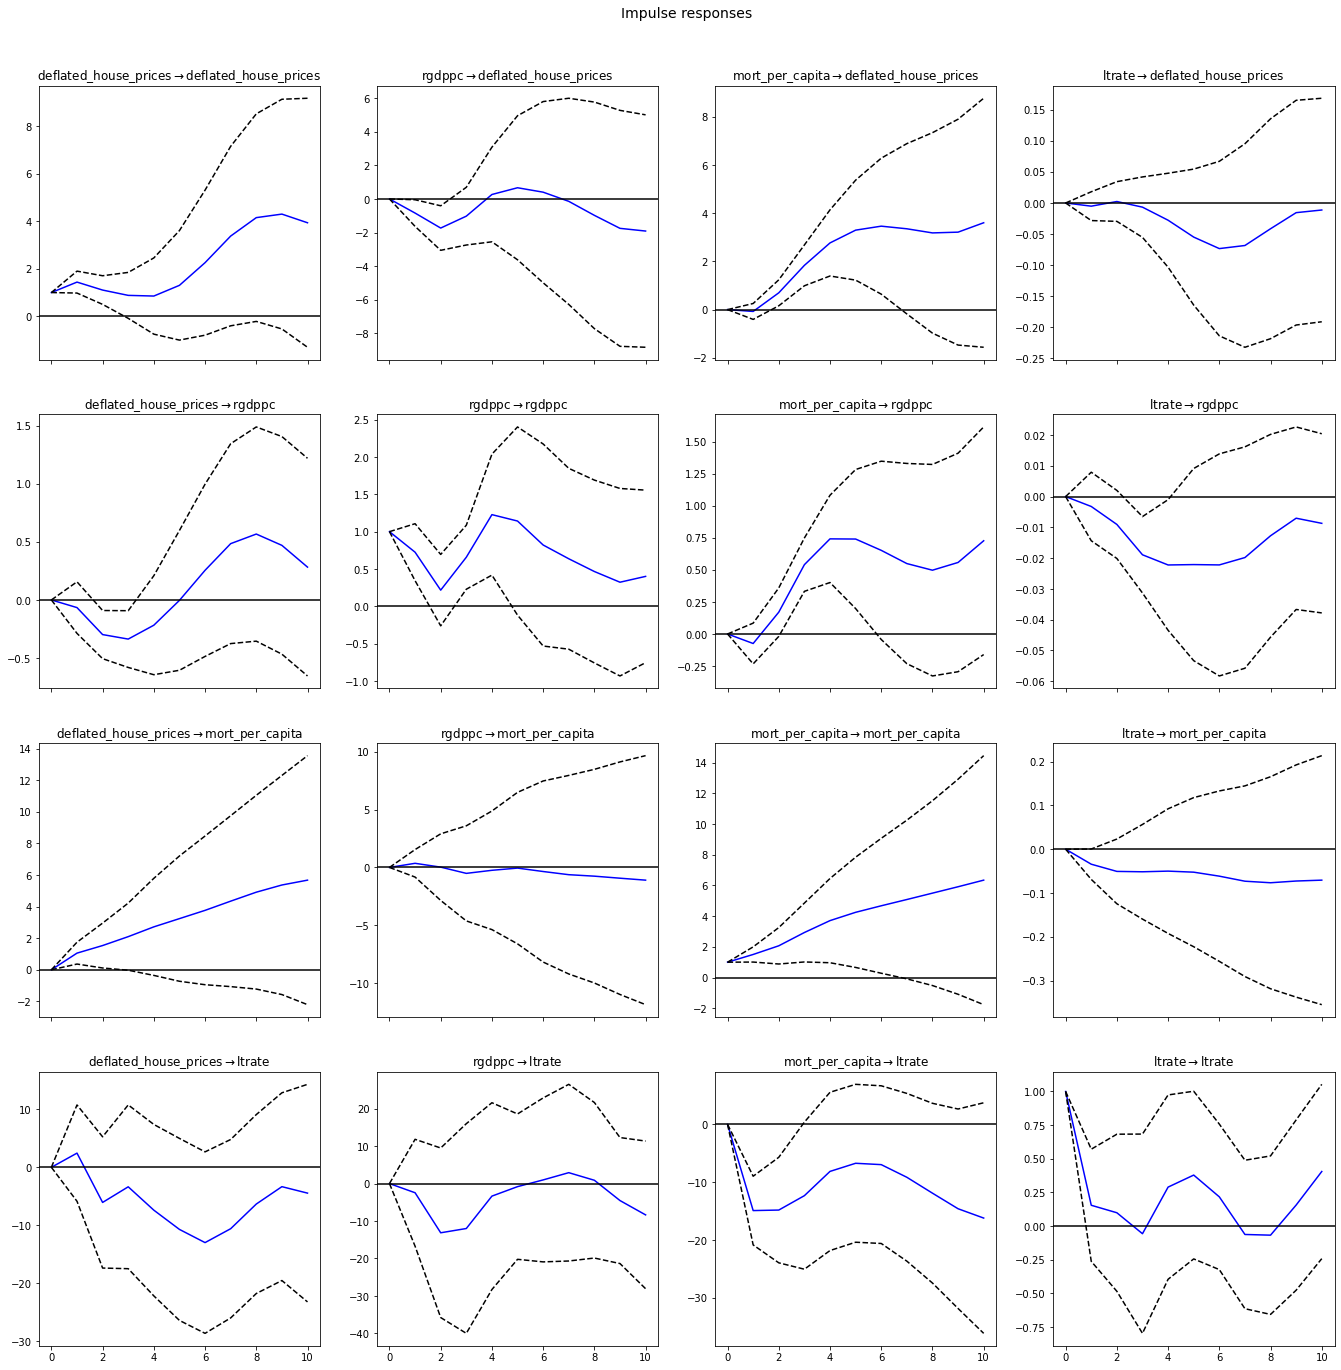

In [107]:
#IRF plots

irf = resultsVECM_oldagedependecyratio_exogcoint.irf().plot().set_size_inches(20, 20)


In [108]:
#granger causality tests:

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=2
test = 'ssr_chi2test'
df= df_merged_subset
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df


df_1 = grangers_causation_matrix(df, variables = df.columns)  
df_1


,GreyPressure_22_x,mort_per_capita_x,rgdppc_x,deflated_house_prices_x,ltrate_x
GreyPressure_22_y,1.0000,0.4634,0.2495,0.3250,0.1689
mort_per_capita_y,0.0554,1.0000,0.0150,0.2600,0.8536
rgdppc_y,0.3429,0.0144,1.0000,0.6962,0.0054
deflated_house_prices_y,0.2322,0.0872,0.2295,1.0000,0.0602
ltrate_y,0.0001,0.5018,0.1801,0.1133,1.0000
